### Stock price prediction using NeuralProphet

This is a Jupyter Notebook. When you execute code within the notebook, the results appear beneath the code. To execute a code chunk, place your cursor on the cell and press Shift+Enter.

Predicting stock price is a difficult task. Many factors affect the stock price like company policies and government policies. These policy changes affect stock prices to rise or fall massively. But still, we can predict trends, seasonality and other parameters using historical data. 
We are going to do this using the NeuralProphet library.

### NeuralProphet

[NeuralProphet](https://neuralprophet.com/) is a Neural Network based Time-Series model, inspired by Facebook Prophet and AR-Net, built on PyTorch. This framework addresses some key points like modularity and scalability.
NeuralProphet can produce both single step and multi step-ahead forecasts. But at the moment, NeuralProphet builds models univariately. 

### Install NeuralProphet

You can install NeuralProphet on your machine by running the following commands. 

In [2]:
!pip install neuralprophet

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

     |████████████████████████████████| 103 kB 1.7 MB/s eta 0:00:01
  Using cached convertdate-2.3.2-py3-none-any.whl (47 kB)
     |████████████████████████████████| 98 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 10.4 MB/s eta 0:00:01
  Using cached ipywidgets-7.7.2-py2.py3-none-any.whl (123 kB)
  Using cached pandas-1.1.5-cp36-cp36m-macosx_10_9_x86_64.whl (10.2 MB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
     |████████████████████████████████| 15.3 MB 11.8 MB/s eta 0:00:01
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached PyMeeus-0.5.11.tar.gz (5.4 MB)
  Using cached hijri_converter-2.2.4-py3-none

  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730974 sha256=f13e73507cc26c23b42da6e2bfda58c89a2b9564f4caba7588a377e24787607b
  Stored in directory: /Users/nidhin/Library/Caches/pip/wheels/ad/84/a1/580de9de10e77380cba6a158b745548bc6581c546dcd516098
Successfully built pymeeus


### Install other libraries

In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.5.4-cp36-cp36m-macosx_10_9_x86_64.whl (28.8 MB)


### Import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from neuralprophet import NeuralProphet

The variability of results comes from SGD finding different optima on different runs. The majority of the randomness comes from the random initialization of weights, different learning rates and different shuffling of the data loader. We can control the random number generator by setting its seed.

In [5]:
from neuralprophet import set_random_seed 
set_random_seed(0)

### Import Data

For this tutorial, we will be using the stock data from [NIFTY-50 Stock Market Data (2000 - 2021) Kaggle Dataset](https://www.kaggle.com/rohanrao/nifty50-stock-market-data). We will try to predict Wipro's stock price for this demo.

In [6]:
input_df = pd.read_csv("./data/stock/WIPRO.csv", parse_dates=["Date"])
input_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


### Simple Model

A simple model with neural_prophet for this dataset can be fitted by creating an object of the NeuralProphet class as follows and calling the fit function. This fits a model with the default settings in the model.
In NeuralProphet only two columns are expected ‘ds’ which is the timestamp and ‘y’ the dependent variable( for stocks it is VWAP or Volume Weighted Average Price).

In [7]:
input_df = input_df[["Date", "VWAP"]]
input_df.rename(columns={"Date": "ds", "VWAP": "y"}, inplace=True)

By default, the y values would be min-max normalized. If the user specifically, sets the normalize_y argument to true, the data is z-score normalized. For the time being, we will leave it with default values.
We can perform validation per every epoch during model fitting. This is done by setting the validate_each_epoch and valid_p arguments in the fit function call. This lets us look at the validation metrics while model training.

In [11]:
neural_prophet_model = NeuralProphet()
df_train, df_test = neural_prophet_model.split_df(input_df, freq="D", valid_p=0.2)
neural_prophet_metrics = neural_prophet_model.fit(df_train, freq="D", validation_df=df_test, progress="plot")

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.723% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.865% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 128


  0%|          | 0/140 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.80E-02, min: 4.67E-01


  0%|          | 0/140 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.72E-02, min: 2.21E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.06E-02
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/Users/nidhin/anaconda3/envs/py36/lib/python3.6/site-packages/neuralprophet/forecaster.py", line 2383, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
  0%|          | 0/128 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/nidhin/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/modules/loss.py:912: UserWarning:

Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure th

### Making future predictions from the model

Now let's predict the trend for the next 365 days. 

In [12]:
future_df = neural_prophet_model.make_future_dataframe(input_df, periods=365, n_historic_predictions=len(input_df))
forecast_df = neural_prophet_model.predict(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.723% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.063% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.063% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


### Plotting prediction

Text(0.5, 1.0, 'Wipro Stocks')

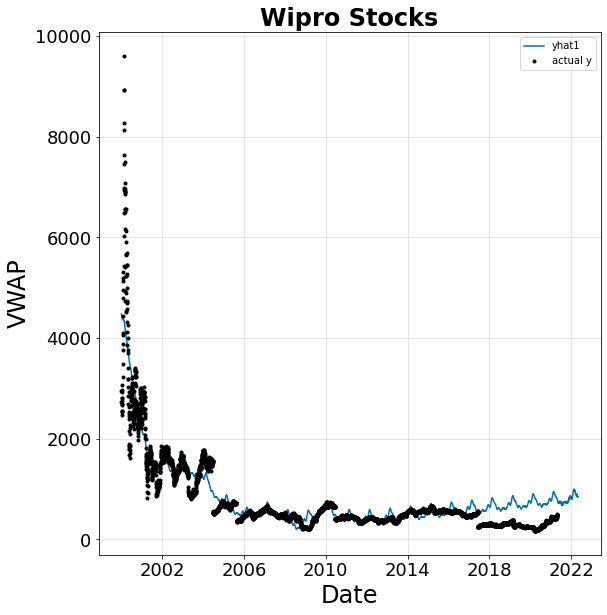

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
neural_prophet_model.plot(forecast_df, xlabel="Date", ylabel="VWAP", ax=ax)

ax.xaxis.label.set_size(24)
ax.yaxis.label.set_size(24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Wipro Stocks", fontsize=24, fontweight="bold")

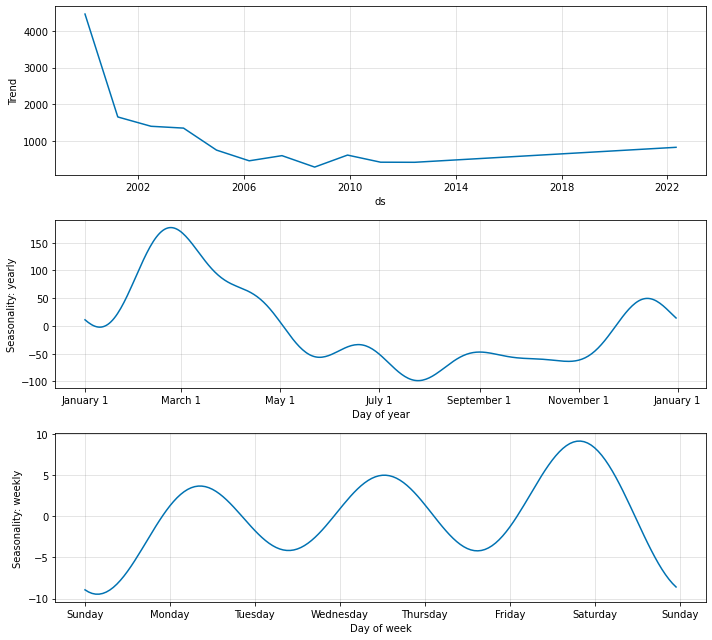

In [14]:
fig_comp = neural_prophet_model.plot_components(forecast_df)

### Plotting the parameters

This will show the trend, trend rate, weekly seasonality and a yearly seasonality.

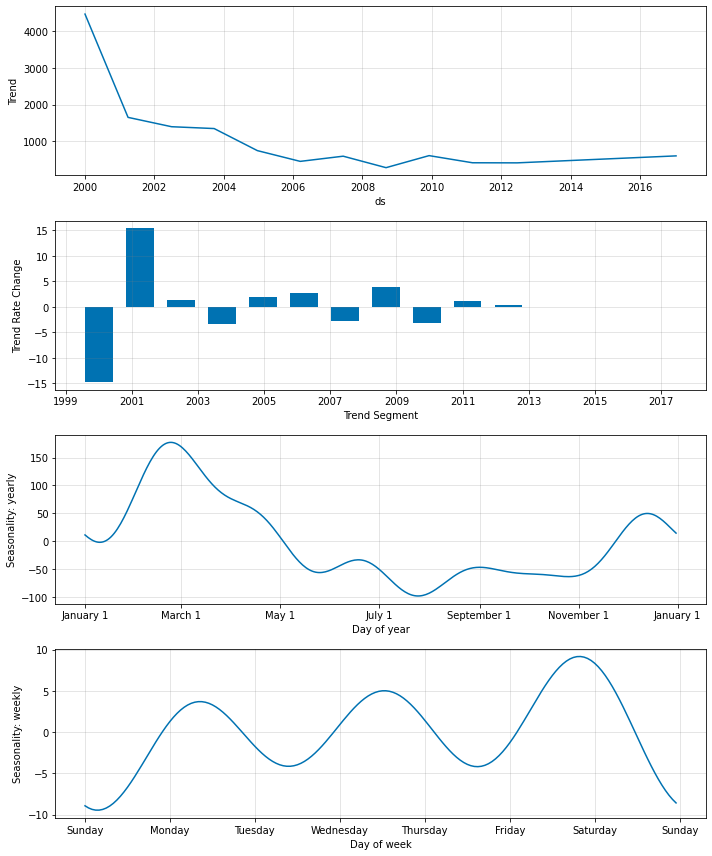

In [15]:
fig_param = neural_prophet_model.plot_parameters()

### Model Loss

Loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater.

Text(0.5, 1.0, 'Model Loss (MAE)')

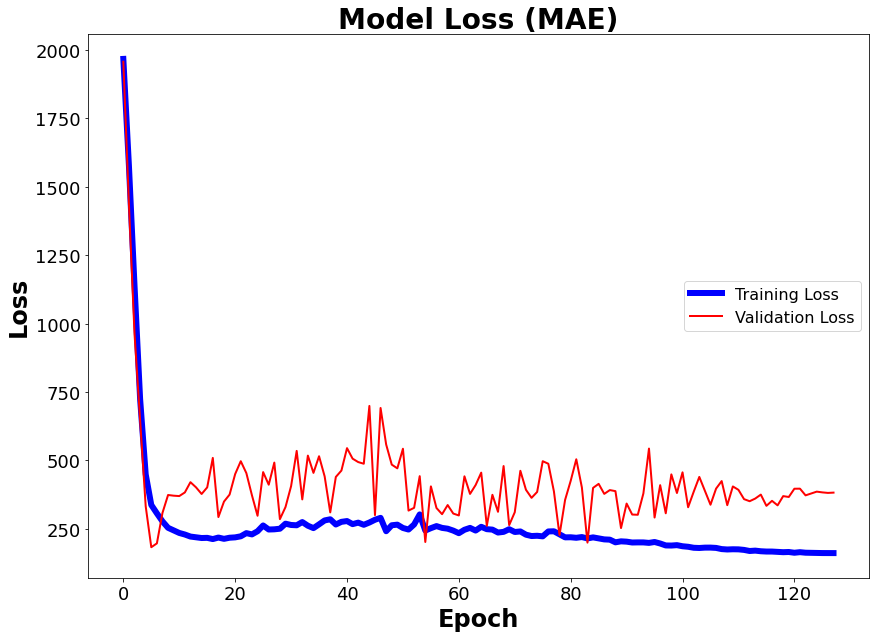

In [16]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(neural_prophet_metrics["MAE"], '-b', linewidth=6, label="Training Loss")  
ax.plot(neural_prophet_metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel("Epoch", fontsize=24, fontweight="bold")
ax.set_ylabel("Loss", fontsize=24, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")

### Conclusion

Hooray! Now we have predicted the stock trend of Wipro using the NeuralProphet library. As you can see, the loss is about 200. Which is not as accurate as we expect from a machine learning model. This model may be improved by optimizing hyperparameters or by enabling [AR-Net](https://ai.facebook.com/blog/ar-net-a-simple-autoregressive-neural-network-for-time-series/). Visit the [official documentation](http://neuralprophet.com/hyperparameter-selection) for a list of available hyperparameters.